In [1]:
# School challenge!! Try to optimize performance of classifier of CRESST data

In [2]:
import numpy as np
import torch
import torch.nn.functional as F

In [3]:
# fetch the data from github (might not be needed)
!test -e training.p || wget https://github.com/WolfgangWaltenberger/vietnam2022/raw/main/training.p

In [4]:
# fetch the data from github (might not be needed)
!test -e validation.p || wget https://github.com/WolfgangWaltenberger/vietnam2022/raw/main/validation.p

In [5]:
## load the 2d data (x_data), with the labels (y_data).
## the labels are {0,1}.
x_data, y_data = torch.load ( "training.p" )
x_test, y_test = torch.load ( "validation.p" )

recordLength = 16384

# Plot point number 5

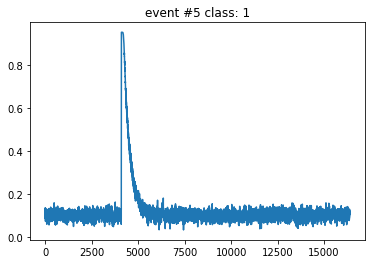

In [14]:
import matplotlib.pyplot as plt
nr = 5
plt.plot ( x_data[nr]) 
plt.title ( f"event #{nr} class: {int(y_data[nr].item())}" );

In [7]:
## now define your neural network. here is a simple one to start with!
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(recordLength, 100) # 2 in and 1 out
        self.relu = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(100, 1)
        
    def forward(self, x):
        out1 = self.linear1(x)
        act1 = self.relu ( out1 )
        out2 = self.linear2 ( act1 )
        y_pred = torch.sigmoid( out2 )
        return y_pred

In [8]:
# Instantiate the model
model = Model()

In [9]:
## define your loss function 
criterion = torch.nn.BCELoss(reduction='mean')

In [10]:
## choose an optimizer (torch.optim.Adam, torch.optim.SGD, ... )
## it takes model.parameters() as input. Choose a learning rate.
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [11]:
# Training loop
for epoch in range(100):
    # Forward pass: Compute predicted y by passing x_data to the model
    y_pred = model(x_data)
    # y_data = y_data.reshape(10000,1)
    # Compute and print loss
    loss = criterion(y_pred, y_data)
    if epoch % 10 == 0:
        print ( f"training: epoch {epoch} loss={loss.data.item():.3f}" )
    
    # Reset gradient, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

training: epoch 0 loss=0.688
training: epoch 10 loss=0.613
training: epoch 20 loss=0.321
training: epoch 30 loss=0.292
training: epoch 40 loss=0.272
training: epoch 50 loss=0.252
training: epoch 60 loss=0.233
training: epoch 70 loss=0.216
training: epoch 80 loss=0.200
training: epoch 90 loss=0.183


In [12]:
# Check the performance of the model with the test data set
correct, carrier, total = 0, 0, len(x_test)
ctr = 0
for pulse, label in zip ( x_test, y_test ):
    ctr += 1
    output = model(pulse)
    predicted = int(output.data[0] > .5)
    label = int ( label )
    correct += (predicted == label)
    carrier += label

print ( '%d/%d of the data were carriers.' % ( carrier, total ) )
    
print('Accuracy of the model on the %d test images: %.2f %%' % ( total, 100. * correct / total))

245/500 of the data were carriers.
Accuracy of the model on the 500 test images: 94.20 %


In [13]:
# torch.save(model.state_dict(), 'my_model.ckpt' )